# Imports and Paths

In [143]:
import json
import pandas as pd
import numpy as np
from plotnine import *
import plotnine
from sklearn import metrics

plotnine.options.figure_size = (12, 8)
from pandas.api.types import is_string_dtype
pd.options.display.max_columns=100
pd.options.display.max_rows=200

In [2]:
PATH = '/data/msnow/football/'
# PATH = 'E:/MyDocuments/GitHub/fantasy_football/'

# New Player Data

In [69]:
df_plyr = pd.read_feather(f'{PATH}df_plyr_merge_score.feather')
df_plyr.shape

(67299, 113)

## Basic stats

In [6]:
num_plyrs = df_plyr.player_id.nunique()
num_plyrs

16058

## Fun properties

How many players have the same name

In [39]:
# df_repeat = df_plyr.loc[df_plyr.pos!='no_pos',['player','player_id','year','pos','team']]
df_repeat = df_plyr[['player','player_id','year','pos','team']]
df_repeat = df_repeat.groupby('player_id',sort=False, as_index=False).first()
df_repeat = df_repeat.loc[df_repeat.duplicated(subset = ['player'],keep=False),:]
df_repeat.sort_values(['player','year'])

,player_id,player,year,pos,team
7161,jenka.20,A.J. Jenkins,1990,no_pos,Pittsburgh Steelers
7160,jenka.00,A.J. Jenkins,2013,wr,Kansas City Chiefs
1647,browaa20,Aaron Brown,1970,rde,Kansas City Chiefs
1648,browaa21,Aaron Brown,1978,no_pos,Tampa Bay Buccaneers
1646,browaa00,Aaron Brown,2009,wr,Detroit Lions
7500,joneaa20,Aaron Jones,1988,lde/rolb,Pittsburgh Steelers
7499,joneaa00,Aaron Jones,2017,rb,Green Bay Packers
13075,smitaa20,Aaron Smith,1984,no_pos,Denver Broncos
13076,smitaa99,Aaron Smith,1999,no_pos,Pittsburgh Steelers
14771,wallaa20,Aaron Wallace,1990,no_pos,Los Angeles Raiders


In [40]:
df_repeat.player_id.nunique(), df_repeat.player.nunique()

(1085, 488)

How many players have the same name and played at the same time

In [41]:
# df_repeat = df_plyr.loc[df_plyr.pos!='no_pos',['player','player_id','year','pos','team']]
df_repeat = df_plyr[['player','player_id','year','pos','team']]
df_repeat = df_repeat.loc[df_repeat.duplicated(subset = ['player','year'],keep=False),:]
df_repeat = df_repeat.sort_values(['player','year'])
df_repeat = df_repeat.groupby(['player'], sort=False, as_index=False).head(2)
df_repeat

,player,player_id,year,pos,team
46994,Adrian Peterson,petead00,2007,rb,Chicago Bears
46997,Adrian Peterson,petead01,2007,rb,Minnesota Vikings
54704,Alex Smith,smital02,2005,te,Tampa Bay Buccaneers
54713,Alex Smith,smital03,2005,qb,San Francisco 49ers
54752,Andre Smith,smitan02,2013,no_pos,other
54781,Andre Smith,smitan23,2013,rt/t,Cincinnati Bengals
14228,Bob Davis,davibo21,1946,lh,Boston Yanks
14229,Bob Davis,davibo22,1946,re,Pittsburgh Steelers
30611,Bobby Johnson,johnbo00,1984,wr,New York Giants
30620,Bobby Johnson,johnbo20,1984,no_pos,New Orleans Saints


In [42]:
df_repeat.player_id.nunique(), df_repeat.player.nunique()

(228, 114)

How many players have the same name, played at the same time and at the same position

In [44]:
df_repeat = df_plyr.loc[df_plyr.pos!='no_pos',['player','player_id','year','pos','team']]
df_repeat = df_repeat.loc[df_repeat.duplicated(subset = ['player','pos','year'],keep=False),:]
df_repeat = df_repeat.sort_values(['player','year'])
df_repeat = df_repeat.groupby(['player'], sort=False, as_index=False).head(2)
df_repeat

,player,player_id,year,pos,team
46994,Adrian Peterson,petead00,2007,rb,Chicago Bears
46997,Adrian Peterson,petead01,2007,rb,Minnesota Vikings
62408,Gene Washington,washge00,1970,wr,San Francisco 49ers
62420,Gene Washington,washge01,1970,wr,Minnesota Vikings
32131,Keith Jones,joneke00,1989,rb,Cleveland Browns
32132,Keith Jones,joneke01,1989,rb,Atlanta Falcons
43680,Mark Murphy,murpma01,1983,fs,Green Bay Packers
43697,Mark Murphy,murpma20,1983,fs,Washington Redskins
64949,Mike Williams,willmi03,2010,wr,Seattle Seahawks
64951,Mike Williams,willmi04,2010,wr,Tampa Bay Buccaneers


In [30]:
df_repeat.player_id.nunique(), df_repeat.player.nunique()

(14, 7)

How many players have the same name and played for the same team

In [33]:
# df_repeat = df_plyr.loc[df_plyr.pos!='no_pos',['player','player_id','year','pos','team']]
df_repeat = df_plyr[['player','player_id','year','pos','team']]
df_repeat = df_repeat.loc[df_repeat.duplicated(subset = ['player','team'],keep=False),:]
df_repeat = df_repeat.sort_values(['player','team'])
df_repeat = df_repeat.groupby(['player','team'], sort=False, as_index=False).head(2)
df_repeat

,player,player_id,pos,team
50601,A'Shawn Robinson,robias00,dt,Detroit Lions
50602,A'Shawn Robinson,robias00,dt,Detroit Lions
63484,A.D. Whitfield,whita.00,hb,Washington Redskins
63485,A.D. Whitfield,whita.00,hb,Washington Redskins
5628,A.J. Bouye,bouya.00,cb/db/lcb,Houston Texans
5629,A.J. Bouye,bouya.00,db/lcb,Houston Texans
16420,A.J. Duhe,duhea.00,rde,Miami Dolphins
16421,A.J. Duhe,duhea.00,rde,Miami Dolphins
18295,A.J. Feeley,feela.00,qb,Philadelphia Eagles
18298,A.J. Feeley,feela.00,qb,Philadelphia Eagles


How many players have the same name, played at the same time and for the same team

In [45]:
# df_repeat = df_plyr.loc[df_plyr.pos!='no_pos',['player','player_id','year','pos','team']]
df_repeat = df_plyr[['player','player_id','year','pos','team']]
df_repeat = df_repeat.loc[df_repeat.duplicated(subset = ['player','team','year'],keep=False),:]
df_repeat = df_repeat.sort_values(['player','team'])
df_repeat = df_repeat.groupby(['player'], sort=False, as_index=False).head(2)
df_repeat

,player,player_id,year,pos,team
30840,Dennis Johnson,johnde00,1978,no_pos,Buffalo Bills
30857,Dennis Johnson,johnde23,1978,no_pos,Buffalo Bills
36109,Michael Lewis,lewimi00,2007,no_pos,San Francisco 49ers
36119,Michael Lewis,lewimi99,2007,ss,San Francisco 49ers
32230,Mike Jones,jonemi21,1998,llb,St. Louis Rams
32241,Mike Jones,jonemi23,1998,rde,St. Louis Rams
39627,Mike McCoy,mccomi21,1976,ldt,Green Bay Packers
39632,Mike McCoy,mccomi22,1976,db,Green Bay Packers
29513,Robert Jackson,jackro21,1980,g,Cleveland Browns
29515,Robert Jackson,jackro22,1980,lilb,Cleveland Browns


In [46]:
df_repeat.player_id.nunique(), df_repeat.player.nunique()

(10, 5)

## Previous and Future Season Averages

In [65]:
df_season = df_plyr[['player_id','year']].sort_values(['player_id','year'])
df_plyr['season_number'] = df_season.groupby('player_id', sort=False, as_index=False).cumcount()

In [67]:
df_plyr[['player_id','player','year','season_number']].head(10)

,player_id,player,year,season_number
0,aaitis00,Isaako Aaitui,2013,0
1,abbotvin01,Vince Abbott,1987,0
2,abbotvin01,Vince Abbott,1988,1
3,abbrja00,Jared Abbrederis,2015,0
4,abbrja00,Jared Abbrederis,2016,1
5,abbrja00,Jared Abbrederis,2017,2
6,abdeme00,Mehdi Abdesmad,2016,0
7,abduam00,Ameer Abdullah,2015,0
8,abduam00,Ameer Abdullah,2016,1
9,abduam00,Ameer Abdullah,2017,2


In [77]:
multiseason = df_plyr.loc[df_plyr.season_number>0,'player_id'].unique()
df_multiseason = df_plyr.loc[df_plyr.player_id.isin(multiseason),:].reset_index(drop=True)

df_multiseason.shape

(62834, 113)

In [106]:
season_gt0 = df_multiseason.index[df_multiseason.season_number>0]
years_back = 4
for ssn in range(1,years_back+1):
    var_nm ='ff_m' + str(ssn)
    df_multiseason[var_nm] = -777
    season_gt = df_multiseason.index[df_multiseason.season_number>(ssn-1)]
    df_multiseason.loc[season_gt,var_nm] = df_multiseason.loc[season_gt-ssn,'ff_score_mean'].values


In [131]:
# seaons_left = df_multiseason[['player_id','season_number']].sort_values(['player_id','season_number'],ascending=False).groupby('player_id', as_index=False).cumcount()
# df_multiseason['sea_left'] = seaons_left
# season_lt = df_multiseason.index[df_multiseason.sea_left>0]
# df_multiseason['ff_p1'] = -777
df_multiseason.loc[season_lt,'ff_p1'] = df_multiseason.loc[season_lt+1,'ff_score_mean'].values

In [126]:
df_multiseason.

In [125]:
seaons_left.index

Int64Index([62833, 62832, 62831, 62830, 62829, 62828, 62827, 62826, 62825,
            62824,
            ...
                9,     8,     7,     6,     5,     4,     3,     2,     1,
                0],
           dtype='int64', length=62834)

In [132]:
df_multiseason.loc[df_multiseason.player_id=='zornji00',:]

,age,catch_pct,first_name,fumbles,games,games_started,last_name,player,player_id,pos,rec,rec_long,rec_per_g,rec_td,rec_yds,rec_yds_per_g,rec_yds_per_rec,targets,team,team_id,year,id,all_purpose_yds,all_purpose_yds_per_touch,rush_att,rush_att_per_g,rush_long,rush_receive_td,rush_td,rush_yds,rush_yds_per_att,rush_yds_per_g,touches,yds_from_scrimmage,fg_perc,fga,fga1,fga2,fga3,fga4,fga5,fgm,fgm1,fgm2,fgm3,fgm4,fgm5,punt,punt_blocked,punt_long,...,pass_sacked_yds,pass_td,pass_td_perc,pass_yds,pass_yds_per_att,pass_yds_per_cmp,pass_yds_per_g,qb_rec,kick_ret,kick_ret_long,kick_ret_td,kick_ret_yds,kick_ret_yds_per_ret,punt_ret,punt_ret_long,punt_ret_td,punt_ret_yds,punt_ret_yds_per_ret,all_td,int_td,fum_td,ko_td,block_rtd,points_per_g,punt_td,safety_md,scoring,two_pt_att,two_pt_md,def_int,def_int_long,def_int_td,def_int_yds,fumbles_forced,fumbles_rec,fumbles_rec_td,fumbles_rec_yds,pass_defended,sacks,tackles_assists,tackles_solo,ff_score,ff_score_mean,season_number,ff_m1,ff_m2,ff_m3,ff_m4,sea_left,ff_p1
62810,23,-999.0,Jim,7.0,14,14,Zorn,Jim Zorn,zornji00,qb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,Seattle Seahawks,sea,1976,zornji00_1976,238.0,4.6,52.0,3.7,19.0,4.0,4.0,246.0,4.7,17.6,52.0,246.0,-888.0,0.0,-888.0,-888.0,-888.0,-888.0,-888.0,0.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,...,196.0,12.0,2.7,2571.0,5.9,12.4,183.6,0.14286,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,4.0,0.0,0.0,0.0,0.0,1.7,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-8.0,0.0,-999.0,-999.0,-999.0,131.44,9.388571,0,-777.000000,-777.000000,-777.000000,-777.000000,10,11.158000
62811,24,-999.0,Jim,1.0,10,10,Zorn,Jim Zorn,zornji00,qb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,Seattle Seahawks,sea,1977,zornji00_1977,141.0,5.6,25.0,2.5,15.0,1.0,1.0,141.0,5.6,14.1,25.0,141.0,-888.0,0.0,-888.0,-888.0,-888.0,-888.0,-888.0,0.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,...,43.0,16.0,6.4,1687.0,6.7,16.2,168.7,0.40000,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,1.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-999.0,-999.0,-999.0,111.58,11.158000,1,9.388571,-777.000000,-777.000000,-777.000000,9,12.145000
62812,25,-999.0,Jim,11.0,16,16,Zorn,Jim Zorn,zornji00,qb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,Seattle Seahawks,sea,1978,zornji00_1978,272.0,4.6,59.0,3.7,23.0,6.0,6.0,290.0,4.9,18.1,59.0,290.0,-888.0,0.0,-888.0,-888.0,-888.0,-888.0,-888.0,0.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,...,284.0,15.0,3.4,3283.0,7.4,13.2,205.2,0.56250,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,6.0,0.0,0.0,0.0,0.0,2.3,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-18.0,0.0,-999.0,-999.0,-999.0,194.32,12.145000,2,11.158000,9.388571,-777.000000,-777.000000,8,13.646250
62813,26,-999.0,Jim,6.0,16,16,Zorn,Jim Zorn,zornji00,qb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,Seattle Seahawks,sea,1979,zornji00_1979,279.0,6.1,46.0,2.9,41.0,2.0,2.0,279.0,6.1,17.4,46.0,279.0,-888.0,0.0,-888.0,-888.0,-888.0,-888.0,-888.0,0.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,...,201.0,20.0,4.0,3661.0,7.2,12.8,228.8,0.56250,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,2.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,12.0,0.0,0.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,218.34,13.646250,3,12.145000,11.158000,9.388571,-777.000000,7,10.327500
62814,27,-999.0,Jim,12.0,16,16,Zorn,Jim Zorn,zornji00,qb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-999.0,Seattle Seahawks,sea,1980,zornji00_1980,201.0,4.6,44.0,2.8,25.0,1.0,1.0,214.0,4.9,13.4,44.0,214.0,-888.0,0.0,-888.0,-888.0,-888.0,-888.0,-888.0,0.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,...,341.0,17.0,3.5,3346.0,6.9,12.1,209.1,0.25000,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,-888.0,1.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,-13.0,0.0,-999.0,-999.0,-999.0,165.24,10.327500,4,13.646250,12.145000,11.158000,9.388571,6,12.424615
62815,

In [133]:
many_list = df_multiseason.loc[(df_multiseason.season_number>7) & (df_multiseason.ff_score_mean>0),'player_id'].unique()
df_multiseason.loc[df_multiseason.player_id.isin(many_list),['player_id','player','year','season_number','ff_score_mean','ff_m1','ff_m2','ff_m3','ff_m4','ff_p1']]

,player_id,player,year,season_number,ff_score_mean,ff_m1,ff_m2,ff_m3,ff_m4,ff_p1
64,abrado00,Donnie Abraham,1996,0,0.000000,-777.000000,-777.000000,-777.000000,-777.000000,0.000000
65,abrado00,Donnie Abraham,1997,1,0.000000,0.000000,-777.000000,-777.000000,-777.000000,0.000000
66,abrado00,Donnie Abraham,1998,2,0.000000,0.000000,0.000000,-777.000000,-777.000000,0.000000
67,abrado00,Donnie Abraham,1999,3,0.000000,0.000000,0.000000,0.000000,-777.000000,0.000000
68,abrado00,Donnie Abraham,2000,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
69,abrado00,Donnie Abraham,2001,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
70,abrado00,Donnie Abraham,2002,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
71,abrado00,Donnie Abraham,2003,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000
72,abrado00,Donnie Abraham,2004,8,0.375000,0.000000,0.000000,0.000000,0.000000,-777.000000
360,aguialou01,Louie Aguiar,1991,0,0.237500,-777.000000,-777.000000,-777.000000,-777.000000,0.000000


In [134]:
df_multiseason.to_feather(f'{PATH}df_plyr_past_and_future.feather')

In [64]:
print(df_plyr.columns.tolist())

['age', 'catch_pct', 'first_name', 'fumbles', 'games', 'games_started', 'last_name', 'player', 'player_id', 'pos', 'rec', 'rec_long', 'rec_per_g', 'rec_td', 'rec_yds', 'rec_yds_per_g', 'rec_yds_per_rec', 'targets', 'team', 'team_id', 'year', 'id', 'all_purpose_yds', 'all_purpose_yds_per_touch', 'rush_att', 'rush_att_per_g', 'rush_long', 'rush_receive_td', 'rush_td', 'rush_yds', 'rush_yds_per_att', 'rush_yds_per_g', 'touches', 'yds_from_scrimmage', 'fg_perc', 'fga', 'fga1', 'fga2', 'fga3', 'fga4', 'fga5', 'fgm', 'fgm1', 'fgm2', 'fgm3', 'fgm4', 'fgm5', 'punt', 'punt_blocked', 'punt_long', 'punt_yds', 'punt_yds_per_punt', 'xp_perc', 'xpa', 'xpm', 'comebacks', 'game_winning_drives', 'pass_adj_net_yds_per_att', 'pass_adj_yds_per_att', 'pass_att', 'pass_cmp', 'pass_cmp_perc', 'pass_int', 'pass_int_perc', 'pass_long', 'pass_net_yds_per_att', 'pass_rating', 'pass_sacked', 'pass_sacked_perc', 'pass_sacked_yds', 'pass_td', 'pass_td_perc', 'pass_yds', 'pass_yds_per_att', 'pass_yds_per_cmp', 'pass

## Visualizations

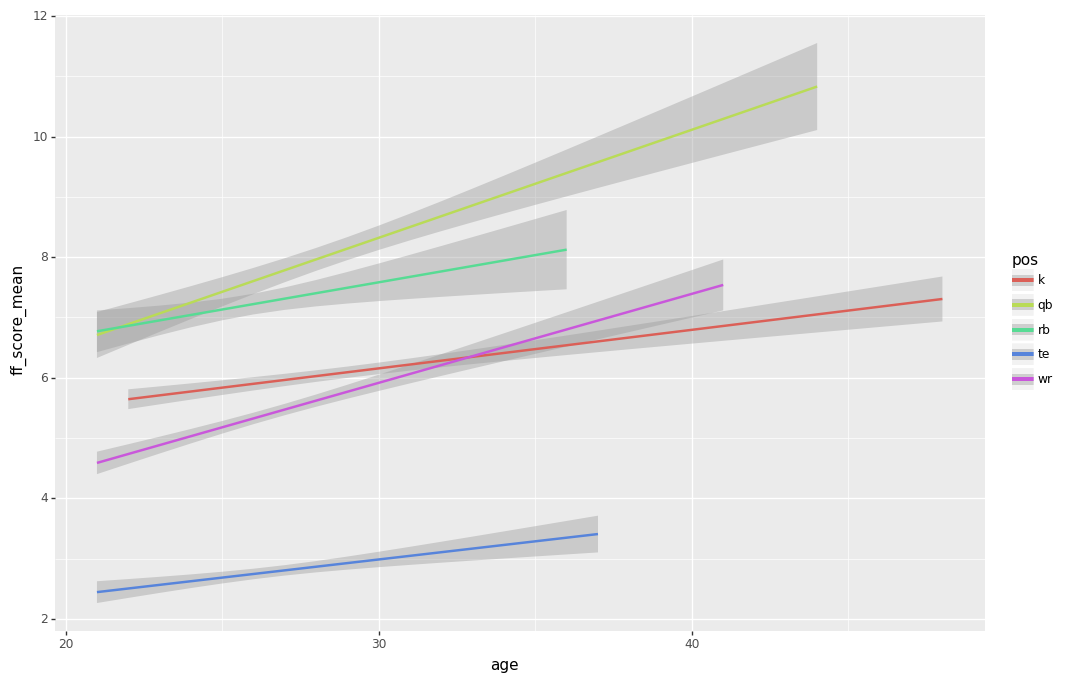

<ggplot: (8766948098382)>

In [49]:
df_year = df_plyr[['player_id','ff_score_mean','age','pos']]
# df_year = df_year.groupby(['player_id','ff_score_mean','age','pos'],sort=False,as_index=False).mean()
df_year = df_year.loc[df_year.ff_score_mean>0,:]
df_year = df_year.loc[df_year.pos.isin(['rb','wr','qb','te','k']),:]
ggplot(df_year, aes(x='age', y='ff_score_mean',color='pos')) + geom_smooth()

In [59]:
df_season = df_plyr[['player_id','ff_score_mean','pos','year']].sort_values(['player_id','year'])
df_season['season_number'] = df_season.groupby('player_id', sort=False, as_index=False).cumcount()
# df_season

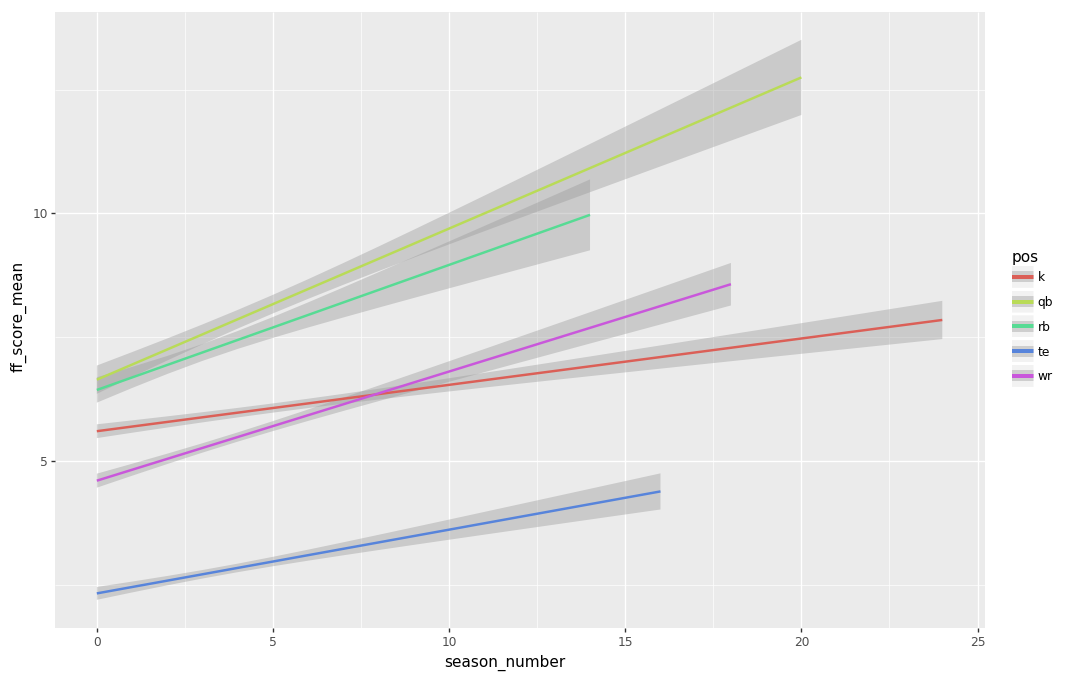

<ggplot: (8766943089037)>

In [61]:
df_year = df_season.loc[df_season.ff_score_mean>0,:]
df_year = df_year.loc[df_year.pos.isin(['rb','wr','qb','te','k']),:]
ggplot(df_year, aes(x='season_number', y='ff_score_mean',color='pos')) + geom_smooth()

In [140]:
df_ffp1 = df_multiseason[['player_id','pos','ff_score_mean','ff_p1','ff_m1','ff_m2']]
df_ffp1 = df_ffp1.loc[(df_ffp1.ff_p1 > 0) & (df_ffp1.ff_score_mean>0),:]
df_ffp1 = df_ffp1.loc[df_ffp1.pos.isin(['rb','wr','qb','te','k']),:]

In [ ]:
df_pp1_pos.shape

In [152]:
corr_dict = {}
for pos in df_ffp1.pos.unique():
    df_pp1_pos = df_ffp1.loc[df_ffp1.pos==pos,:]
    corr_dict[pos] = np.corrcoef(df_pp1_pos.ff_score_mean, df_pp1_pos.ff_p1)[1][0]
df_corr = pd.DataFrame({'pos':list(corr_dict.keys()), 'corr':list(corr_dict.values())})

In [162]:
corr_dict.values()

dict_values([0.4436080879098569, 0.66107915580738263, 0.62583161829353984, 0.69412059135519899, 0.66976818578719044])

,corr,pos
0,0.443608,k
1,0.661079,rb
2,0.625832,wr
3,0.694121,te
4,0.669768,qb


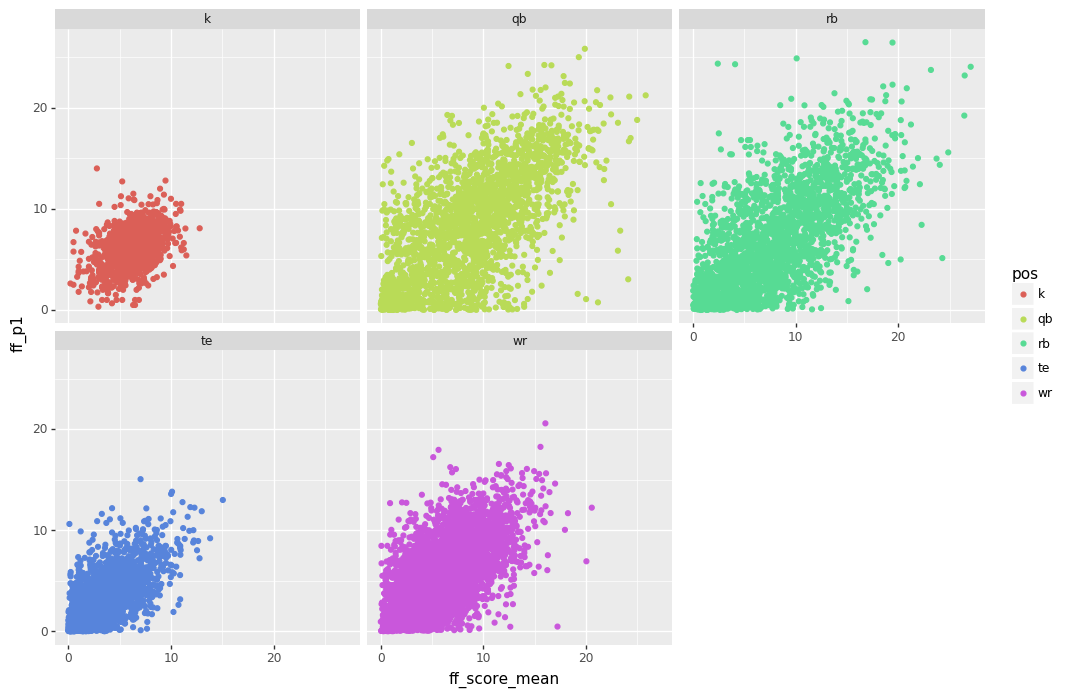

<ggplot: (8766849364246)>

In [164]:
ggplot(df_ffp1, aes('ff_score_mean', 'ff_p1', color='pos')) + geom_point() + facet_wrap("~pos")

# Old Player Data

## Load and clean the Data

In [51]:
df_games_raw = pd.read_json(f'{PATH}games_1512362753.8735218.json')
df_players_raw = pd.read_json(f'{PATH}profiles_1512362725.022629.json')

In [4]:
# df_games_raw.to_feather(f'{PATH}df_games_raw.feather')
# df_players_raw.to_feather(f'{PATH}df_players_raw.feather')
df_games_raw = pd.read_feather(f'{PATH}df_games_raw.feather')
# df_players_raw.to_feather(f'{PATH}df_players_raw.feather')
!ls -lh {PATH} 

total 2.2G
-rw-r--r--. 1 msnow msnow 349M Aug 26 15:06 df_games_raw.feather
-rw-r--r--. 1 msnow msnow 372M Aug 26 16:21 df_merge.feather
-rw-r--r--. 1 msnow msnow 4.1M Aug 26 15:06 df_players_raw.feather
-rw-r--r--. 1 msnow msnow 365M Aug 21 19:21 game_player_merge.feather
-rw-rw-r--. 1 msnow msnow 1.1G Dec  8  2017 games_1512362753.8735218.json
-rw-rw-r--. 1 msnow msnow  32M Aug 19 09:12 games_1512362753.8735218.json.zip
-rw-rw-r--. 1 msnow msnow 9.8M Dec  8  2017 profiles_1512362725.022629.json
-rw-rw-r--. 1 msnow msnow 1.5M Aug 19 09:18 profiles_1512362725.022629.json.zip
-rw-rw-r--. 1 msnow msnow 9.9M Aug 19 10:12 season_data.csv
-rw-r--r--. 1 msnow msnow  29M Aug 19 10:11 season_data.feather


In [14]:
df_games_raw.head()

,age,date,defense_interception_touchdowns,defense_interception_yards,defense_interceptions,defense_sacks,defense_safeties,defense_tackle_assists,defense_tackles,field_goal_attempts,field_goal_makes,game_location,game_number,game_won,kick_return_attempts,kick_return_touchdowns,kick_return_yards,opponent,opponent_score,passing_attempts,passing_completions,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_id,player_team_score,point_after_attemps,point_after_makes,punt_return_attempts,punt_return_touchdowns,punt_return_yards,punting_attempts,punting_blocked,punting_yards,receiving_receptions,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts,rushing_touchdowns,rushing_yards,team,year
0,23-120,1990-09-09,0,0,0,0.0,0,0,0,0,0,A,1,False,0,0,0,CHI,17,0,0,0,0.0,0,0,0,0,1809,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SEA,1990
1,23-127,1990-09-16,0,0,0,0.0,0,0,0,0,0,H,2,False,0,0,0,RAI,17,0,0,0,0.0,0,0,0,0,1809,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SEA,1990
2,23-134,1990-09-23,0,0,0,0.0,0,0,0,0,0,A,3,False,0,0,0,DEN,34,0,0,0,0.0,0,0,0,0,1809,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SEA,1990
3,23-142,1990-10-01,0,0,0,0.0,0,0,0,0,0,H,4,True,0,0,0,CIN,16,0,0,0,0.0,0,0,0,0,1809,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SEA,1990
4,23-148,1990-10-07,0,0,0,0.0,0,0,0,0,0,A,5,True,0,0,0,NWE,20,0,0,0,0.0,0,0,0,0,1809,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,SEA,1990


In [10]:
df_games_raw.dtypes

age                                        object
date                               datetime64[ns]
defense_interception_touchdowns             int64
defense_interception_yards                  int64
defense_interceptions                       int64
defense_sacks                             float64
defense_safeties                            int64
defense_tackle_assists                      int64
defense_tackles                             int64
field_goal_attempts                         int64
field_goal_makes                            int64
game_location                              object
game_number                                 int64
game_won                                     bool
kick_return_attempts                        int64
kick_return_touchdowns                      int64
kick_return_yards                           int64
opponent                                   object
opponent_score                              int64
passing_attempts                            int64


In [43]:
df_games = df_games_raw.drop(columns=['age'])
cat_dict = {}
cat_dict_list = {}
for n,c in df_games.items():
    if is_string_dtype(c): 
        df_games[n] = c.astype('category').cat.as_ordered()
        cat_dict[n] = {i:v for i,v in enumerate(df_games[n].cat.categories)}
        cat_dict_list[n] = list(df_games[n].cat.categories)
        df_games[n] = df_games[n].cat.codes

In [46]:
df_players_raw.head()

,birth_date,birth_place,college,current_salary,current_team,death_date,draft_position,draft_round,draft_team,draft_year,height,high_school,hof_induction_year,name,player_id,position,weight
0,1967-05-12,"Bay City, TX",Baylor,None,None,None,34.0,2.0,Seattle Seahawks,1990.0,6-0,"Van Vleck, TX",NaN,Robert Blackmon,1809,DB,208.0
1,1970-07-20,"Louisville, KY",Kentucky,None,None,None,85.0,4.0,Seattle Seahawks,1993.0,6-3,"Holy Cross, KY",NaN,Dean Wells,23586,LB,248.0
2,1990-08-14,"Newton, MA",Oregon,"1,075,000",Miami Dolphins,None,46.0,2.0,Buffalo Bills,2013.0,6-3,"Los Gatos, CA",NaN,Kiko Alonso,355,ILB,238.0
3,1948-04-22,"Dallas, TX",North Texas,None,None,1999-10-15,126.0,5.0,New Orleans Saints,1970.0,6-2,"W.W. Samuell, TX",NaN,Steve Ramsey,18182,QB,210.0
4,1988-02-27,"Neptune, NJ",Miami (FL),None,None,None,NaN,NaN,None,NaN,6-0,"Neptune, NJ",NaN,Cory Nelms,16250,CB,195.0


In [52]:
df_players_raw.head()

,birth_date,birth_place,college,current_salary,current_team,death_date,draft_position,draft_round,draft_team,draft_year,height,high_school,hof_induction_year,name,player_id,position,weight
0,1967-05-12,"Bay City, TX",Baylor,None,None,None,34.0,2.0,Seattle Seahawks,1990.0,6-0,"Van Vleck, TX",NaN,Robert Blackmon,1809,DB,208.0
1,1970-07-20,"Louisville, KY",Kentucky,None,None,None,85.0,4.0,Seattle Seahawks,1993.0,6-3,"Holy Cross, KY",NaN,Dean Wells,23586,LB,248.0
2,1990-08-14,"Newton, MA",Oregon,"1,075,000",Miami Dolphins,None,46.0,2.0,Buffalo Bills,2013.0,6-3,"Los Gatos, CA",NaN,Kiko Alonso,355,ILB,238.0
3,1948-04-22,"Dallas, TX",North Texas,None,None,1999-10-15,126.0,5.0,New Orleans Saints,1970.0,6-2,"W.W. Samuell, TX",NaN,Steve Ramsey,18182,QB,210.0
4,1988-02-27,"Neptune, NJ",Miami (FL),None,None,None,NaN,NaN,None,NaN,6-0,"Neptune, NJ",NaN,Cory Nelms,16250,CB,195.0


In [124]:
df_players_narrow = df_players_raw.loc[:,['birth_date','college','height','name','player_id','position']]
df_players_narrow.birth_date = pd.to_datetime(df_players_narrow.birth_date, format='%Y-%m-%d')
df_players_narrow['birth_year'] = df_players_narrow.birth_date.dt.year

In [125]:
ht_tmp_ft = pd.to_numeric(df_players_raw.height.str.split('-').str.get(0), errors='coerce') 
ht_tmp_in = pd.to_numeric(df_players_raw.height.str.split('-').str.get(1), errors='coerce') 
ht_tmp = ht_tmp_ft*12 + ht_tmp_in
ht_tmp.fillna(ht_tmp.mean(),inplace=True)
ht_tmp = ht_tmp.astype(int)
df_players_narrow.height = ht_tmp

In [126]:
df_players_narrow.dtypes

birth_date    datetime64[ns]
college               object
height                 int64
name                  object
player_id              int64
position              object
birth_year           float64
dtype: object

In [127]:
n='college'
df_players_narrow[n] = df_players_narrow['college'].astype('category').cat.as_ordered()
cat_dict[n] = {i:v for i,v in enumerate(df_players_narrow[n].cat.categories)}
cat_dict_list[n] = list(df_players_narrow[n].cat.categories)
df_players_narrow[n] = df_players_narrow[n].cat.codes

In [128]:
df_players_narrow.head()

,birth_date,college,height,name,player_id,position,birth_year
0,1967-05-12,55,72,Robert Blackmon,1809,DB,1967.0
1,1970-07-20,312,75,Dean Wells,23586,LB,1970.0
2,1990-08-14,499,75,Kiko Alonso,355,ILB,1990.0
3,1948-04-22,471,74,Steve Ramsey,18182,QB,1948.0
4,1988-02-27,385,72,Cory Nelms,16250,CB,1988.0


In [148]:
# df_merge = df_games.merge(df_players_narrow, on='player_id', how='left')
# df_merge['age'] = df_merge.year - df_merge.birth_year.astype(int)
df_merge.drop(columns=['birth_date','birth_year'], inplace=True)

In [149]:
df_merge.head()

,date,defense_interception_touchdowns,defense_interception_yards,defense_interceptions,defense_sacks,defense_safeties,defense_tackle_assists,defense_tackles,field_goal_attempts,field_goal_makes,game_location,game_number,game_won,kick_return_attempts,kick_return_touchdowns,kick_return_yards,opponent,opponent_score,passing_attempts,passing_completions,passing_interceptions,passing_rating,passing_sacks,passing_sacks_yards_lost,passing_touchdowns,passing_yards,player_id,player_team_score,point_after_attemps,point_after_makes,punt_return_attempts,punt_return_touchdowns,punt_return_yards,punting_attempts,punting_blocked,punting_yards,receiving_receptions,receiving_targets,receiving_touchdowns,receiving_yards,rushing_attempts,rushing_touchdowns,rushing_yards,team,year,college,height,name,position,age
0,1990-09-09,0,0,0,0.0,0,0,0,0,0,0,1,False,0,0,0,6,17,0,0,0,0.0,0,0,0,0,1809,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,1990,55,72,Robert Blackmon,DB,23
1,1990-09-16,0,0,0,0.0,0,0,0,0,0,1,2,False,0,0,0,33,17,0,0,0,0.0,0,0,0,0,1809,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,1990,55,72,Robert Blackmon,DB,23
2,1990-09-23,0,0,0,0.0,0,0,0,0,0,0,3,False,0,0,0,11,34,0,0,0,0.0,0,0,0,0,1809,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,1990,55,72,Robert Blackmon,DB,23
3,1990-10-01,0,0,0,0.0,0,0,0,0,0,1,4,True,0,0,0,7,16,0,0,0,0.0,0,0,0,0,1809,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,1990,55,72,Robert Blackmon,DB,23
4,1990-10-07,0,0,0,0.0,0,0,0,0,0,0,5,True,0,0,0,24,20,0,0,0,0.0,0,0,0,0,1809,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,1990,55,72,Robert Blackmon,DB,23


In [155]:
df_merge.to_feather(f'{PATH}df_merge.feather')

## Calculate score for each game

In [150]:
ff_passing = df_merge.passing_yards*0.04 + df_merge.passing_touchdowns*4 - df_merge.passing_interceptions*2
ff_rushing = df_merge.rushing_yards*0.1 + df_merge.rushing_touchdowns*6
ff_receiving = df_merge.receiving_yards*0.1 + df_merge.receiving_touchdowns*6
ff_misc = df_merge.kick_return_touchdowns*6 + df_merge.punt_return_touchdowns*6 
ff_kick = df_merge.point_after_makes*2 - df_merge.point_after_attemps + df_merge.field_goal_makes * 5 - df_merge.field_goal_attempts
df_merge['ff_score'] = ff_passing + ff_rushing + ff_receiving + ff_misc + ff_kick

In [170]:
# df_srt = df_merge[['player_id', 'year']].sort_values(['player_id', 'year'])
# first_season = df_srt[['player_id','year']].groupby(['player_id'], sort=False).first().reset_index()
# first_season.rename(columns={'year':'first_season'}, inplace=True)
df_merge_2 = df_merge.merge(first_season,on=['player_id'], how='left')

In [172]:
df_merge_2['season_number'] = df_merge_2.year - df_merge_2.first_season

## Visualizations

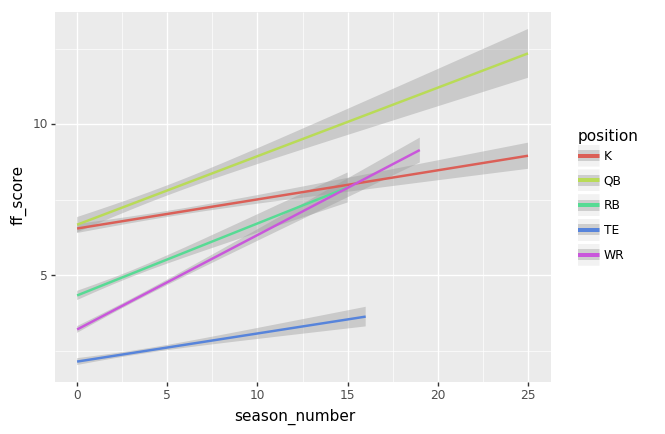

<ggplot: (8781397777507)>

In [237]:
df_year = df_merge_2.loc[:,['player_id','ff_score','season_number','position']]
df_year = df_year.groupby(['player_id','season_number','position'],sort=False,as_index=False).mean()
df_year = df_year.loc[df_year.ff_score>0,:]
df_year = df_year.loc[df_year.position.isin(['RB','WR','QB','TE','K']),:]
ggplot(df_year, aes(x='season_number', y='ff_score',color='position')) + geom_smooth()

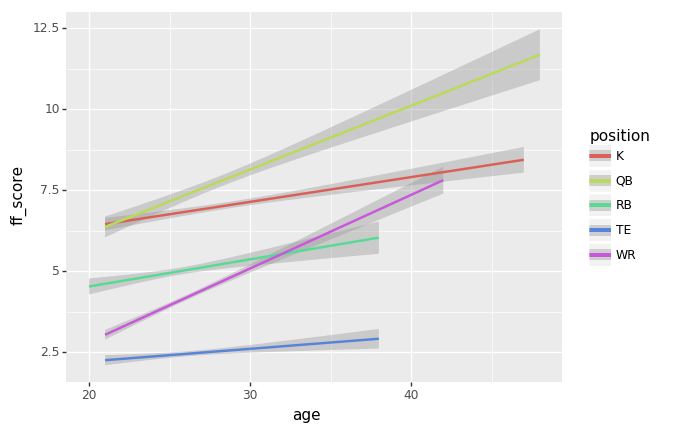

<ggplot: (-9223363255456957261)>

In [240]:
df_age = df_merge_2.loc[:,['player_id','ff_score','age','position']]
df_age = df_age.groupby(['player_id','age','position'],sort=False,as_index=False).mean()
df_age = df_age.loc[df_age.ff_score>0,:]
df_age = df_age.loc[df_age.position.isin(['RB','WR','QB','TE','K']),:]
ggplot(df_age, aes(x='age', y='ff_score',color='position')) + geom_smooth()

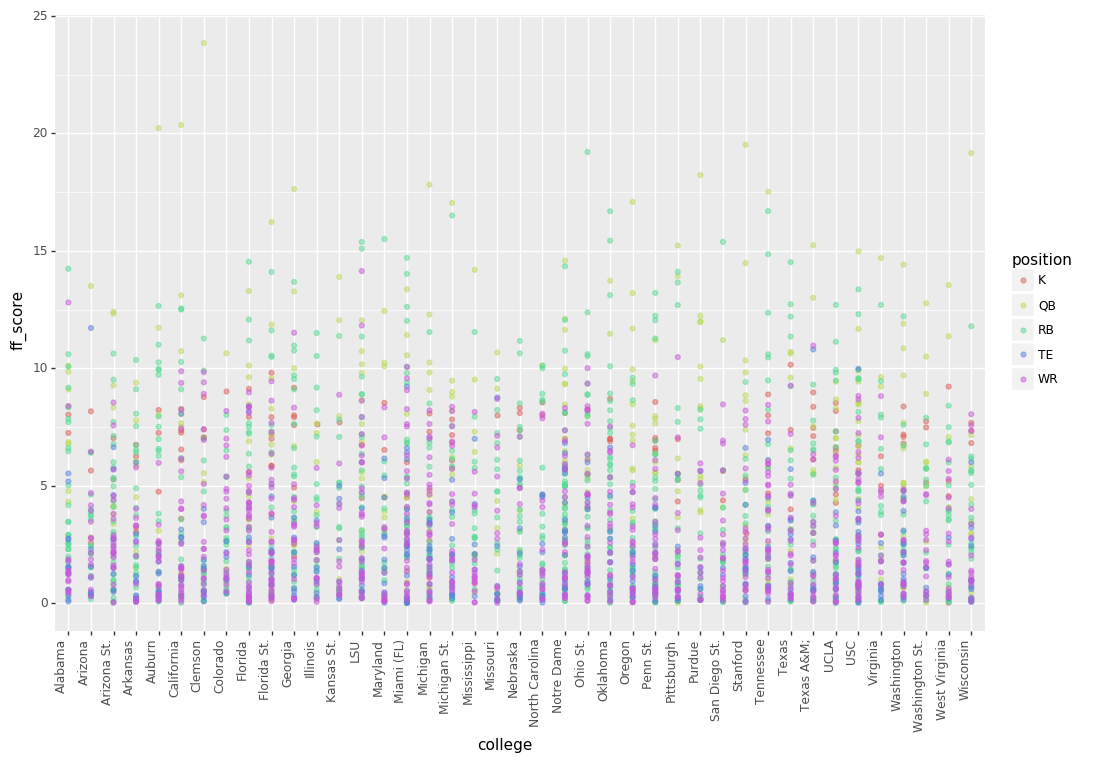

<ggplot: (8781396559894)>

In [287]:
df_college = df_merge_2.loc[:,['player_id','ff_score','college','position']]
df_college.college.replace(cat_dict['college'],inplace=True)
df_college = df_college.groupby(['player_id','college','position'],sort=False,as_index=False).mean()
df_college = df_college.loc[df_college.ff_score>0,:]
df_college = df_college.loc[df_college.position.isin(['RB','WR','QB','TE','K']),:]
college_list = (df_college.college.value_counts()>40).index.tolist()
vc = df_college.college.value_counts()
college_list = vc[vc>40].index.tolist()
df_college2 = df_college.loc[df_college.college.isin(college_list),:]
ggplot(df_college2, aes(x='college', y='ff_score',color='position')) + geom_point(alpha=0.5) + theme(axis_text_x=element_text(rotation=90, hjust=1))

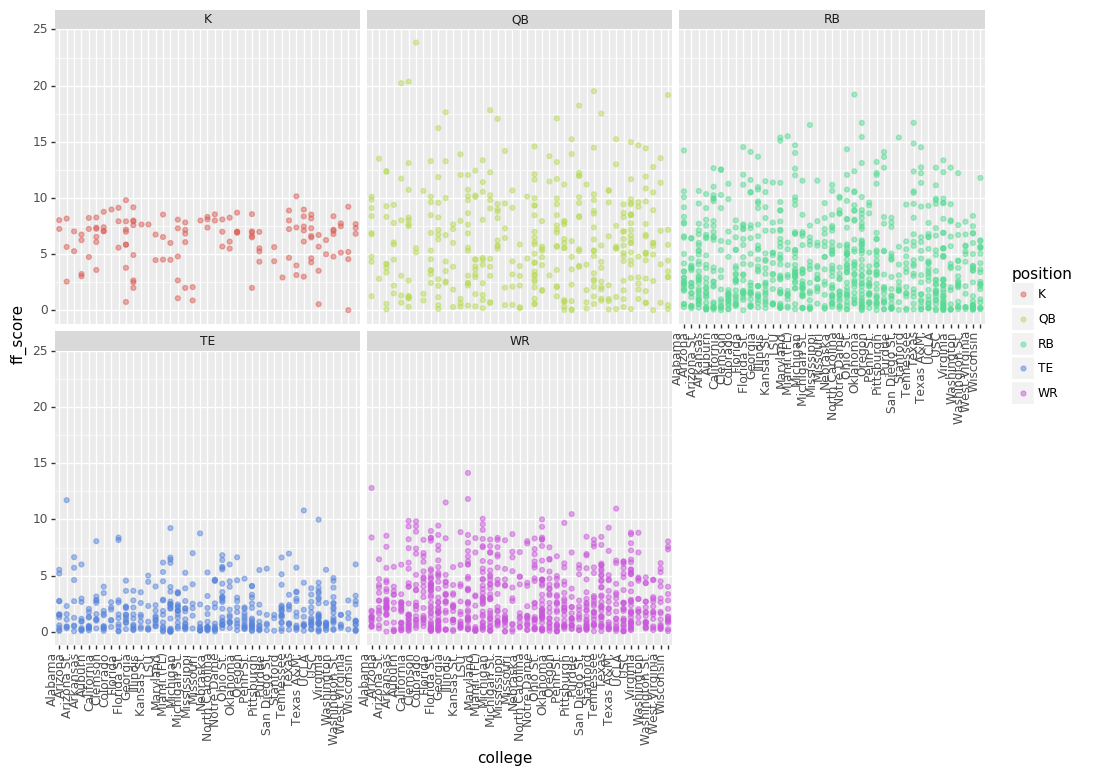

<ggplot: (8781398240881)>

In [346]:
ggplot(df_college2, aes(x='college', y='ff_score',color='position')) + geom_point(alpha=0.5) + theme(axis_text_x=element_text(rotation=90, hjust=1)) + facet_wrap("~position") 

In [339]:
df_year_all = df_merge_2.loc[:,['player_id','ff_score','season_number','position']]
df_year_all = df_year_all.groupby(['player_id','season_number','position'],sort=False,as_index=False).mean()
df_year_all = df_year_all.loc[df_year_all.position.isin(['RB','WR','QB','TE','K']),:]
df_seasonnumber = df_year_all.loc[df_year_all.season_number==0,['player_id','position']]
for i in range(df_year.season_number.max()):
    tmp_df = df_year.loc[df_year.season_number==i,['player_id','ff_score']]
    tmp_df.rename(columns = {'ff_score':'season_'+str(i).zfill(2)}, inplace=True)
    df_seasonnumber = df_seasonnumber.merge(tmp_df, on='player_id', how='left')
df_seasonnumber.head()

,player_id,position,season_00,season_01,season_02,season_03,season_04,season_05,season_06,season_07,season_08,season_09,season_10,season_11,season_12,season_13,season_14,season_15,season_16,season_17,season_18,season_19,season_20,season_21,season_22,season_23,season_24
0,18182,QB,NaN,4.377778,5.50000,2.352000,4.142857,6.752727,8.361667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4310,TE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13379,RB,1.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11755,RB,2.864706,5.562500,3.31875,4.416667,16.057143,6.280000,8.133333,7.5375,0.955556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24331,TE,0.258333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/data/msnow/miniconda3/envs/data_sci/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 2940 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


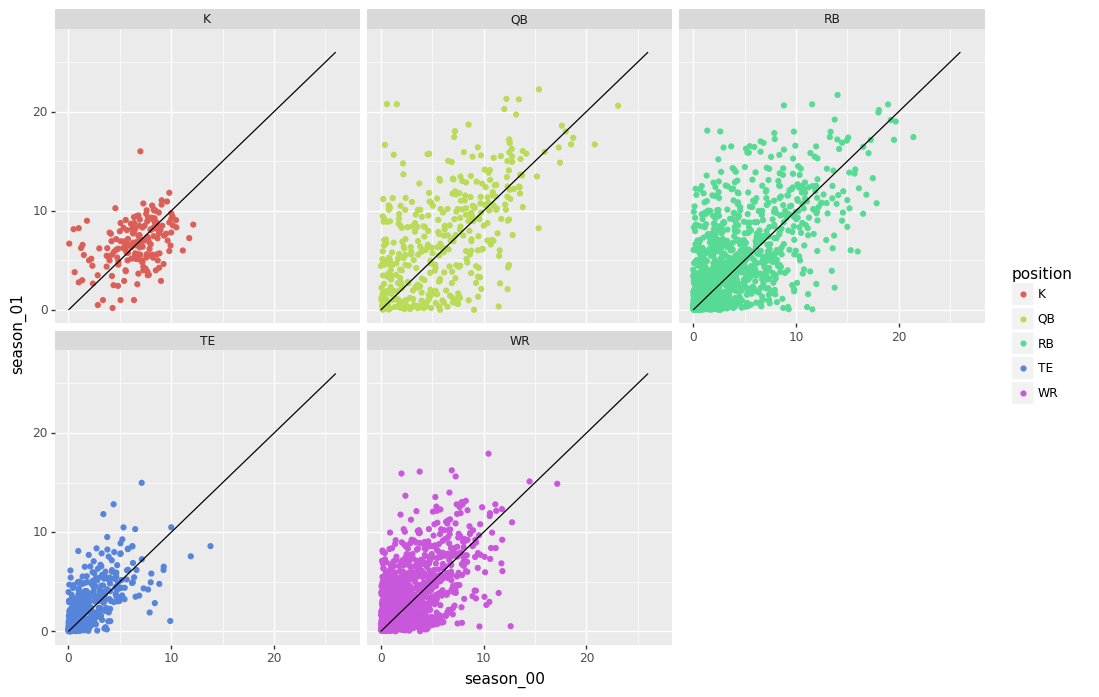

<ggplot: (8781396563348)>

In [338]:
diag_df = pd.DataFrame({'x':[0,26],'y':[0,26]})
p = (ggplot() 
     + geom_point(data=df_seasonnumber, mapping=aes(x='season_00',y='season_01', color='position')) 
     + geom_line(data=diag_df, mapping=aes(x='x',y='y')) 
     + facet_wrap("~position")
     + xlim(0,27)
     + ylim(0,27)
    )
p

/data/msnow/miniconda3/envs/data_sci/lib/python3.6/site-packages/plotnine/layer.py:450: UserWarning: geom_point : Removed 3834 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


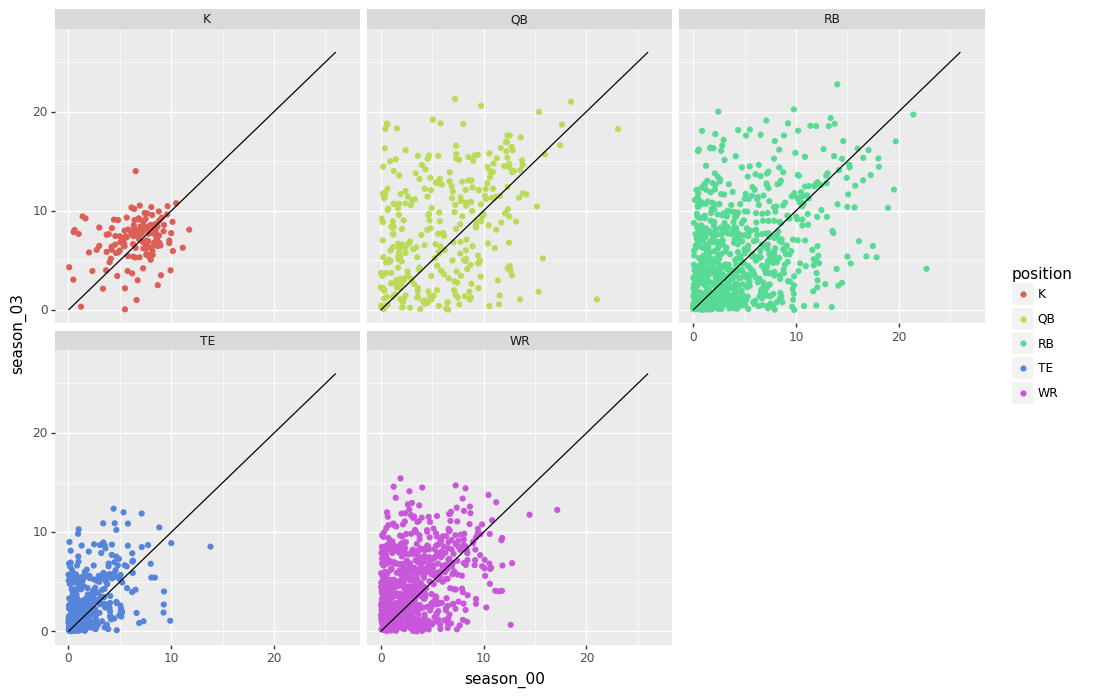

<ggplot: (8781396594166)>

In [345]:
diag_df = pd.DataFrame({'x':[0,26],'y':[0,26]})
p = (ggplot() 
     + geom_point(data=df_seasonnumber, mapping=aes(x='season_00',y='season_03', color='position')) 
     + geom_line(data=diag_df, mapping=aes(x='x',y='y')) 
     + facet_wrap("~position")
     + xlim(0,27)
     + ylim(0,27)
    )
p

# Special Teams

In [17]:
df_teams_raw = pd.read_feather(f'{PATH}df_teams_1966_2017.feather')

In [18]:
df_teams_raw.head()

,Year,blocked_fg_td,def_int,first_down_def,first_down_off,fumbles_rec,fumbles_rec_td,game_date,int_td,kick_ret_td,opp,pass_yds_def,pass_yds_off,pts_def,pts_off,punt_blocked,punt_ret_td,rush_yds_def,rush_yds_off,sacks,safety_md,team,to_def,to_off,yards_def,yards_off
0,1966,0.0,1.214286,18,24,1.928571,0.071429,1966-09-18,0.214286,0.071429,New York Giants,120,374,7,52,0.0,0.0,137,144,4.285714,0.071429,Dallas Cowboys,4,1,257,518
1,1966,0.0,1.214286,25,18,1.928571,0.071429,1966-09-25,0.214286,0.071429,Minnesota Vikings,247,166,17,28,0.0,0.0,142,148,4.285714,0.071429,Dallas Cowboys,1,0,389,314
2,1966,0.0,1.214286,20,22,1.928571,0.071429,1966-10-02,0.214286,0.071429,Atlanta Falcons,170,220,14,47,0.0,0.0,106,143,4.285714,0.071429,Dallas Cowboys,5,2,276,363
3,1966,0.0,1.214286,11,32,1.928571,0.071429,1966-10-09,0.214286,0.071429,Philadelphia Eagles,179,440,7,56,0.0,0.0,38,212,4.285714,0.071429,Dallas Cowboys,1,0,217,652
4,1966,0.0,1.214286,13,17,1.928571,0.071429,1966-10-16,0.214286,0.071429,St. Louis Cardinals,130,191,10,10,0.0,0.0,45,135,4.285714,0.071429,Dallas Cowboys,0,4,175,326


In [28]:
df_teams = df_teams_raw.copy()
df_teams['pa_00'] = 0
df_teams['pa_01_06'] = 0
df_teams['pa_07_13'] = 0
df_teams['pa_14_21'] = 0
df_teams['pa_28_34'] = 0
df_teams['pa_inf'] = 0
df_teams.loc[df_teams.pts_def == 0,'pa_00'] = 1
df_teams.loc[((df_teams.pts_def >=1) & (df_teams.pts_def <= 6)),'pa_01_06'] = 1
df_teams.loc[((df_teams.pts_def >=7) & (df_teams.pts_def <= 13)),'pa_07_13'] = 1
df_teams.loc[((df_teams.pts_def >=14) & (df_teams.pts_def <= 21)),'pa_14_21'] = 1
df_teams.loc[((df_teams.pts_def >=28) & (df_teams.pts_def <= 34)),'pa_28_34'] = 1
df_teams.loc[df_teams.pts_def >=35,'pa_inf'] = 1

In [30]:
df_teams_avg = df_teams.copy()
df_teams_avg = df_teams_avg.drop(columns=['opp','game_date'])
df_teams_avg = df_teams_avg.groupby(['team','Year'], sort=False).mean()
df_teams_avg.reset_index(inplace=True)
df_teams_avg.shape

(1476, 30)

In [31]:
df_teams_avg.head()

,team,Year,blocked_fg_td,def_int,first_down_def,first_down_off,fumbles_rec,fumbles_rec_td,int_td,kick_ret_td,pass_yds_def,pass_yds_off,pts_def,pts_off,punt_blocked,punt_ret_td,rush_yds_def,rush_yds_off,sacks,safety_md,to_def,to_off,yards_def,yards_off,pa_00,pa_01_06,pa_07_13,pa_14_21,pa_28_34,pa_inf
0,Dallas Cowboys,1966,0.000000,1.214286,15.785714,20.500000,1.928571,0.071429,0.214286,0.071429,170.142857,215.928571,17.071429,31.785714,0.0,0.000000,84.000000,151.571429,4.285714,0.071429,2.214286,1.714286,254.142857,367.500000,0.0,0.000000,0.357143,0.357143,0.214286,0.000000
1,Philadelphia Eagles,1966,0.071429,1.428571,17.785714,16.500000,2.071429,0.071429,0.071429,0.142857,191.214286,135.714286,24.285714,23.285714,0.0,0.071429,120.928571,132.785714,2.428571,0.000000,2.500000,2.785714,312.142857,268.500000,0.0,0.071429,0.071429,0.285714,0.142857,0.142857
2,Cleveland Browns,1966,0.000000,2.142857,18.214286,19.857143,1.857143,0.142857,0.071429,0.000000,169.428571,207.500000,18.500000,28.785714,0.0,0.000000,135.285714,154.714286,2.500000,0.000000,3.500000,1.785714,304.714286,362.214286,0.0,0.071429,0.285714,0.357143,0.142857,0.071429
3,St. Louis Cardinals,1966,0.000000,1.500000,14.928571,15.142857,1.285714,0.000000,0.214286,0.071429,164.285714,138.571429,18.928571,18.857143,0.0,0.071429,85.142857,114.357143,3.714286,0.000000,2.214286,2.642857,249.428571,252.928571,0.0,0.071429,0.285714,0.285714,0.214286,0.071429
4,Washington Redskins,1966,0.071429,1.642857,18.642857,16.071429,2.285714,0.071429,0.071429,0.000000,204.357143,215.285714,25.357143,25.071429,0.0,0.071429,130.785714,98.357143,3.214286,0.000000,3.071429,2.500000,335.142857,313.642857,0.0,0.000000,0.214286,0.214286,0.142857,0.285714


In [32]:
df_teams_avg.columns

Index(['team', 'Year', 'blocked_fg_td', 'def_int', 'first_down_def',
       'first_down_off', 'fumbles_rec', 'fumbles_rec_td', 'int_td',
       'kick_ret_td', 'pass_yds_def', 'pass_yds_off', 'pts_def', 'pts_off',
       'punt_blocked', 'punt_ret_td', 'rush_yds_def', 'rush_yds_off', 'sacks',
       'safety_md', 'to_def', 'to_off', 'yards_def', 'yards_off', 'pa_00',
       'pa_01_06', 'pa_07_13', 'pa_14_21', 'pa_28_34', 'pa_inf'],
      dtype='object')

In [33]:
df_teams_avg['ff_score'] = (df_teams_avg.sacks + df_teams_avg.int_td*6 + df_teams_avg.fumbles_rec_td*6
                            + df_teams_avg.kick_ret_td*6 + df_teams_avg.punt_ret_td*6 + df_teams_avg.punt_blocked*2
                            + df_teams_avg.def_int*2 + df_teams_avg.fumbles_rec*2 + df_teams_avg.safety_md*2
                            + df_teams_avg.blocked_fg_td*6 + df_teams_avg.pa_00*10 + df_teams_avg.pa_01_06*7
                            + df_teams_avg.pa_07_13*4 + df_teams_avg.pa_14_21 + df_teams_avg.pa_28_34*-1
                            + df_teams_avg.pa_inf*-4
                           )

In [34]:
df_teams_avg.head()

,team,Year,blocked_fg_td,def_int,first_down_def,first_down_off,fumbles_rec,fumbles_rec_td,int_td,kick_ret_td,pass_yds_def,pass_yds_off,pts_def,pts_off,punt_blocked,punt_ret_td,rush_yds_def,rush_yds_off,sacks,safety_md,to_def,to_off,yards_def,yards_off,pa_00,pa_01_06,pa_07_13,pa_14_21,pa_28_34,pa_inf,ff_score
0,Dallas Cowboys,1966,0.000000,1.214286,15.785714,20.500000,1.928571,0.071429,0.214286,0.071429,170.142857,215.928571,17.071429,31.785714,0.0,0.000000,84.000000,151.571429,4.285714,0.071429,2.214286,1.714286,254.142857,367.500000,0.0,0.000000,0.357143,0.357143,0.214286,0.000000,14.428571
1,Philadelphia Eagles,1966,0.071429,1.428571,17.785714,16.500000,2.071429,0.071429,0.071429,0.142857,191.214286,135.714286,24.285714,23.285714,0.0,0.071429,120.928571,132.785714,2.428571,0.000000,2.500000,2.785714,312.142857,268.500000,0.0,0.071429,0.071429,0.285714,0.142857,0.142857,12.357143
2,Cleveland Browns,1966,0.000000,2.142857,18.214286,19.857143,1.857143,0.142857,0.071429,0.000000,169.428571,207.500000,18.500000,28.785714,0.0,0.000000,135.285714,154.714286,2.500000,0.000000,3.500000,1.785714,304.714286,362.214286,0.0,0.071429,0.285714,0.357143,0.142857,0.071429,13.357143
3,St. Louis Cardinals,1966,0.000000,1.500000,14.928571,15.142857,1.285714,0.000000,0.214286,0.071429,164.285714,138.571429,18.928571,18.857143,0.0,0.071429,85.142857,114.357143,3.714286,0.000000,2.214286,2.642857,249.428571,252.928571,0.0,0.071429,0.285714,0.285714,0.214286,0.071429,12.857143
4,Washington Redskins,1966,0.071429,1.642857,18.642857,16.071429,2.285714,0.071429,0.071429,0.000000,204.357143,215.285714,25.357143,25.071429,0.0,0.071429,130.785714,98.357143,3.214286,0.000000,3.071429,2.500000,335.142857,313.642857,0.0,0.000000,0.214286,0.214286,0.142857,0.285714,12.571429


In [53]:
df_teams_avg.sort_values(['team','Year'], inplace=True)
df_teams_avg.reset_index(drop=True, inplace=True)
df_teams_avg['season_number'] = df_teams_avg.groupby(['team'], sort=False).cumcount().values
df_teams_avg['ff_n1'] = -999
df_teams_avg['ff_n2'] = -999
df_teams_avg['ff_n3'] = -999
df_teams_avg['ff_n4'] = -999
df_teams_avg.loc[df_teams_avg.index[df_teams_avg.season_number>0],'ff_n1'] = df_teams_avg.loc[(df_teams_avg.index[df_teams_avg.season_number>0] - 1),'ff_score'].values
df_teams_avg.loc[df_teams_avg.index[df_teams_avg.season_number>1],'ff_n2'] = df_teams_avg.loc[(df_teams_avg.index[df_teams_avg.season_number>1] - 2),'ff_score'].values
df_teams_avg.loc[df_teams_avg.index[df_teams_avg.season_number>2],'ff_n3'] = df_teams_avg.loc[(df_teams_avg.index[df_teams_avg.season_number>2] - 3),'ff_score'].values
df_teams_avg.loc[df_teams_avg.index[df_teams_avg.season_number>3],'ff_n4'] = df_teams_avg.loc[(df_teams_avg.index[df_teams_avg.season_number>3] - 4),'ff_score'].values

In [54]:
df_teams_avg.head()

,team,Year,blocked_fg_td,def_int,first_down_def,first_down_off,fumbles_rec,fumbles_rec_td,int_td,kick_ret_td,pass_yds_def,pass_yds_off,pts_def,pts_off,punt_blocked,punt_ret_td,rush_yds_def,rush_yds_off,sacks,safety_md,to_def,to_off,yards_def,yards_off,pa_00,pa_01_06,pa_07_13,pa_14_21,pa_28_34,pa_inf,ff_score,season_number,ff_n1,ff_n2,ff_n3,ff_n4
0,Arizona Cardinals,1994,0.0000,1.4375,15.3125,17.9375,1.6875,0.0000,0.0625,0.0,189.8750,190.4375,16.6875,14.6875,0.0,0.0,85.6250,97.5000,2.1875,0.0625,2.2500,1.8125,275.5000,287.9375,0.0,0.0625,0.3125,0.4375,0.1250,0.0625,10.6875,0,-999.0000,-999.0000,-999.0000,-999.0000
1,Arizona Cardinals,1995,0.0625,1.1875,19.3750,17.8125,2.6250,0.0625,0.2500,0.0,215.9375,218.9375,26.3750,17.1875,0.0,0.0,140.5625,85.1875,1.9375,0.0000,2.6250,2.6875,356.5000,304.1250,0.0,0.0000,0.0625,0.2500,0.2500,0.1875,11.3125,1,10.6875,-999.0000,-999.0000,-999.0000
2,Arizona Cardinals,1996,0.0000,0.6875,21.0625,19.2500,1.5625,0.0625,0.0625,0.0,218.6875,230.5000,24.8125,18.7500,0.0,0.0,116.3750,93.8750,1.7500,0.0000,1.5625,2.1875,335.0625,324.3750,0.0,0.0000,0.1250,0.2500,0.3750,0.1250,6.8750,2,11.3125,10.6875,-999.0000,-999.0000
3,Arizona Cardinals,1997,0.0625,0.9375,18.6250,18.4375,0.7500,0.0000,0.1875,0.0,202.8750,216.1250,23.6875,17.6875,0.0,0.0,136.2500,78.4375,2.1250,0.0000,1.2500,2.6250,339.1250,294.5625,0.0,0.0000,0.1250,0.3125,0.0000,0.1250,7.3125,3,6.8750,11.3125,10.6875,-999.0000
4,Arizona Cardinals,1998,0.0000,1.2500,20.0625,19.6875,2.0000,0.0000,0.0625,0.0,204.7500,217.6250,23.6250,20.3125,0.0,0.0,124.3125,101.6875,2.4375,0.0000,2.4375,2.2500,329.0625,319.3125,0.0,0.0625,0.1250,0.2500,0.1875,0.1875,9.5625,4,7.3125,6.8750,11.3125,10.6875


In [55]:
df_teams_avg.to_feather(f'{PATH}df_teams_avg.feather')
# df_teams_avg = pd.read_feather(f'{PATH}df_teams_avg.feather')

In [6]:
df_games_teams = df_games_raw.copy()
df_games_teams.drop(columns=['age','game_location','game_won','opponent','player_id'], inplace=True)

In [13]:
df_team = df_games_teams.groupby(['team','year','date','game_number'], sort=False).sum()

In [15]:
df_team.head()

defense_interception_touchdowns  \
team year date                                          
SEA  1990 1990-09-09                                0   
          1990-09-16                                0   
          1990-09-23                                0   
          1990-10-01                                0   
          1990-10-07                                0   

                      defense_interception_yards  defense_interceptions  \
team year date                                                            
SEA  1990 1990-09-09                           0                      1   
          1990-09-16                           0                      0   
          1990-09-23                           0                      0   
          1990-10-01                          22                      1   
          1990-10-07                          20                      2   

                      defense_sacks  defense_safeties  defense_tackle_assists  \
team year date                                                                  
SEA  1990 1990-09-09            1.0                 0                       0   
          1990-09-16            1.0                 0                       0   
          1990-09-23            2.0                 0                       0   
          1990-10-01            3.0                 0                       0   
          1990-10-07            2.0                 0                       0   

                      defense_tackles  field_goal_attempts  field_goal_makes  \
team year date                                                                 
SEA  1990 1990-09-09                0                    0                 0   
          1990-09-16                0                    3                 2   
          1990-09-23                0                    3                 1   
          1990-10-01                0                    1                 1   
          1990-10-07                0                    3                 2   

                      game_number  kick_return_attempts  \
team year date                                            
SEA  1990 1990-09-09           42                     4   
          1990-09-16           88                     4   
          1990-09-23          132                     6   
          1990-10-01          172                     1   
          1990-10-07          220                     3   

                      kick_return_touchdowns  kick_return_yards  \
team year date                                                    
SEA  1990 1990-09-09                       0                 77   
          1990-09-16                       0                 60   
          1990-09-23                       0                165   
          1990-10-01                       0                 17   
          1990-10-07                       0                 57   

                      opponent_score  passing_attempts  passing_completions  \
team year date                                                                
SEA  1990 1990-09-09             714                12                   27   
          1990-09-16             748                19                   24   
          1990-09-23            1496                20                   28   
          1990-10-01             688                17                   24   
          1990-10-07             880                17                   25   

                      passing_interceptions  passing_rating  passing_sacks  \
team year date                                                               
SEA  1990 1990-09-09                      3            13.6              3   
          1990-09-16                      1            88.4              1   
          1990-09-23                      0           105.2              1   
          1990-10-01                      1           109.2              2   
          1990-10-07                      1           111.1  

In [16]:
df_team.columns

Index(['defense_interception_touchdowns', 'defense_interception_yards',
       'defense_interceptions', 'defense_sacks', 'defense_safeties',
       'defense_tackle_assists', 'defense_tackles', 'field_goal_attempts',
       'field_goal_makes', 'game_number', 'kick_return_attempts',
       'kick_return_touchdowns', 'kick_return_yards', 'opponent_score',
       'passing_attempts', 'passing_completions', 'passing_interceptions',
       'passing_rating', 'passing_sacks', 'passing_sacks_yards_lost',
       'passing_touchdowns', 'passing_yards', 'player_team_score',
       'point_after_attemps', 'point_after_makes', 'punt_return_attempts',
       'punt_return_touchdowns', 'punt_return_yards', 'punting_attempts',
       'punting_blocked', 'punting_yards', 'receiving_receptions',
       'receiving_targets', 'receiving_touchdowns', 'receiving_yards',
       'rushing_attempts', 'rushing_touchdowns', 'rushing_yards'],
      dtype='object')

In [ ]:
df_team['ff_score'] = (df_team.defense_sacks + df_team.defense_interception_touchdowns*6 
                       + df_team.kick_return_touchdowns*6 + df_team.punt_return_touchdowns * 6
                       + df_team.defense_interceptions*2 + df_team.defense_safeties*2
                       + df_team.punting_blocked*2
                      )

# Scraped data

In [3]:
df_plyr = pd.read_feather(f'{PATH}data/interim/df_plyr_merge_score.feather')
df_plyr.pos = df_plyr.pos.str.lower()

In [4]:
df_main = df_plyr.copy()
df_main = df_main.loc[df_main.pos.isin(['wr','rb','te','qb','k'])]

In [5]:
df_main.pos.value_counts()

wr    12195
rb     8179
te     7048
qb     6064
k      3666
Name: pos, dtype: int64

In [20]:
df_plyr[['player','year','team','pos','age','ff_score']].sort_values('ff_score', ascending=False).head(50)

,player,year,team,pos,age,ff_score
5025,LaDainian Tomlinson,2006,San Diego Chargers,rb,27,423.10
25824,Peyton Manning,2013,Denver Broncos,qb,37,399.98
26009,Drew Brees,2011,New Orleans Saints,qb,32,387.64
25988,Aaron Rodgers,2011,Green Bay Packers,qb,28,387.42
25627,Cam Newton,2015,Carolina Panthers,qb,26,387.08
26361,Tom Brady,2007,New England Patriots,qb,30,386.04
7506,Marshall Faulk,2000,St. Louis Rams,rb,27,374.90
6275,Priest Holmes,2003,Kansas City Chiefs,rb,30,371.00
6715,Priest Holmes,2002,Kansas City Chiefs,rb,29,370.70
25533,Aaron Rodgers,2016,Green Bay Packers,qb,33,368.02


## Histograms

E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\scales\scale.py:534: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)
E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\layer.py:452: UserWarning: geom_histogram : Removed 18 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


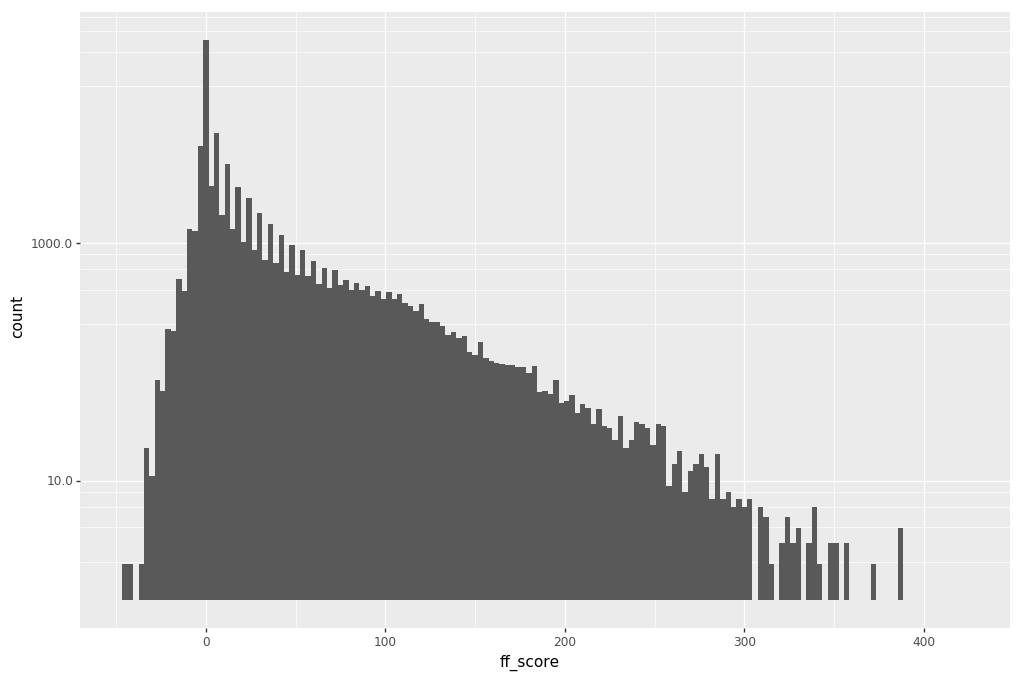

<ggplot: (13155027)>

In [9]:
ggplot(df_plyr[['ff_score']],aes(x='ff_score')) + geom_histogram(binwidth=3)  + scale_y_log10()

E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\scales\scale.py:534: RuntimeWarning: divide by zero encountered in log10
  return self.trans.transform(x)
E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\layer.py:452: UserWarning: geom_histogram : Removed 8 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


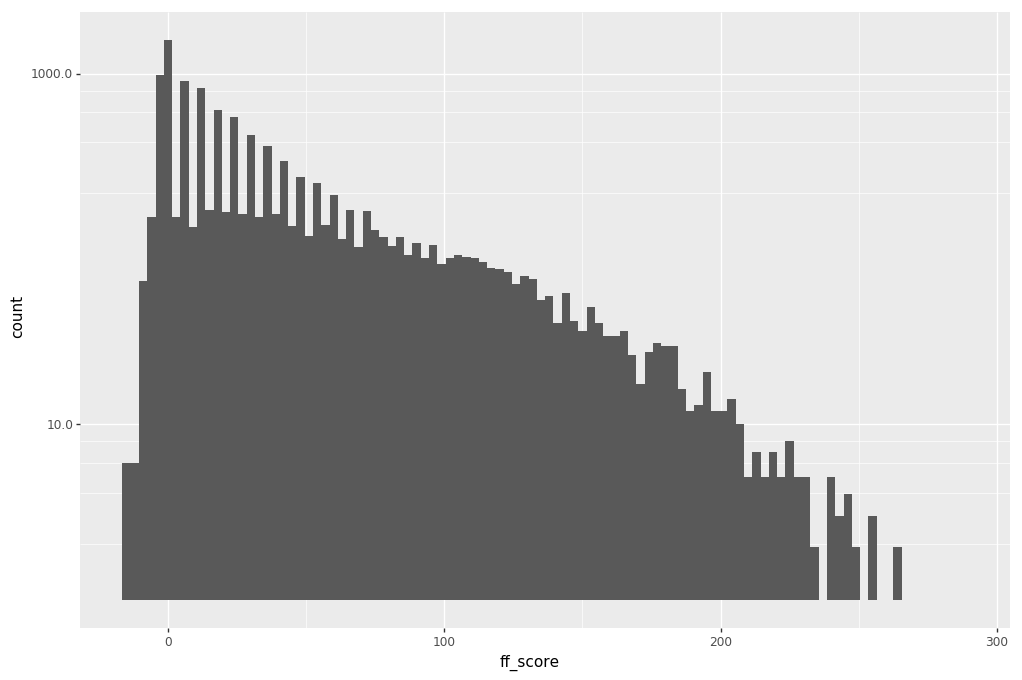

<ggplot: (12835343)>

In [15]:
ggplot(df_plyr.loc[df_plyr.pos=='wr',['ff_score']],aes(x='ff_score')) + geom_histogram(binwidth=3)  + scale_y_log10()

## Smooth Curves

E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
E:\Anaconda3\envs\curriculum\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
E:\Anaconda3\envs\curriculum\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


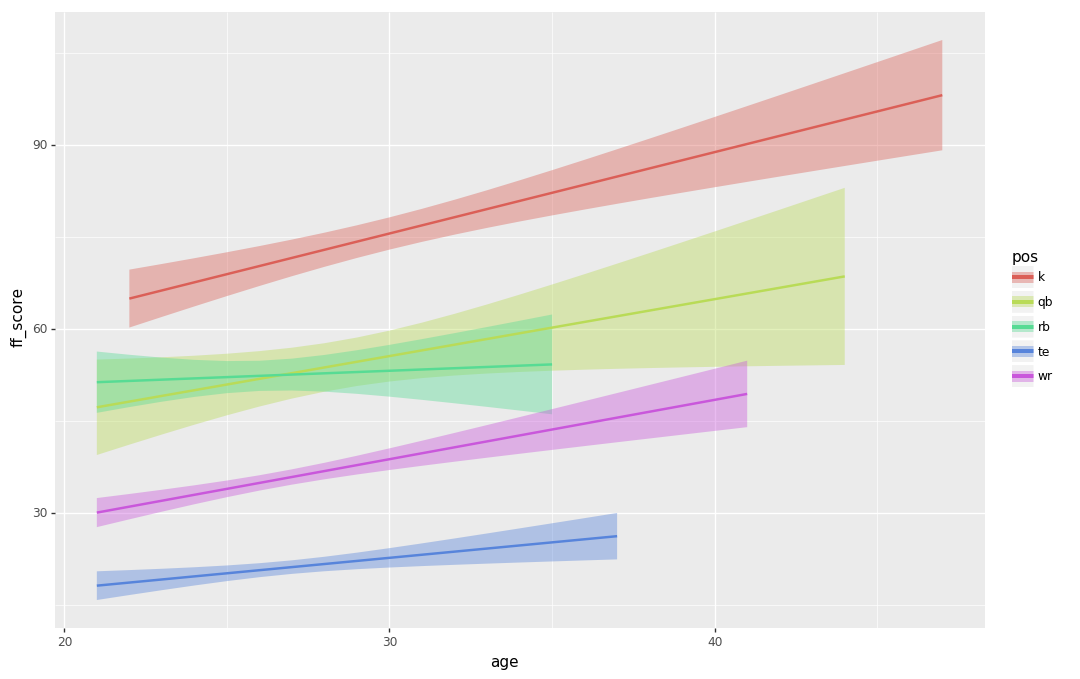

<ggplot: (14251005)>

In [23]:
ggplot(df_main.loc[df_main.year> 2000, ['age','ff_score','pos']],aes(x='age',y='ff_score', color='pos')) + geom_smooth(aes(fill='pos'))

E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
E:\Anaconda3\envs\curriculum\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
E:\Anaconda3\envs\curriculum\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


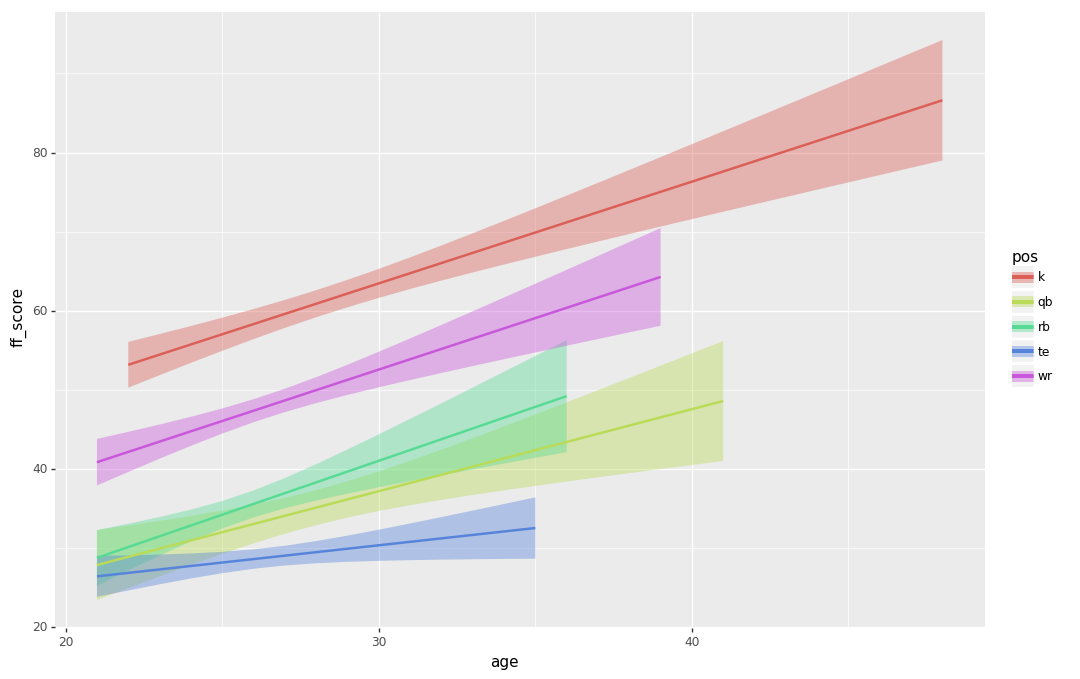

<ggplot: (-9223372036842590043)>

In [21]:
ggplot(df_main.loc[df_main.year< 1990, ['age','ff_score','pos']],aes(x='age',y='ff_score', color='pos')) + geom_smooth(aes(fill='pos'))

E:\Anaconda3\envs\curriculum\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
E:\Anaconda3\envs\curriculum\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
E:\Anaconda3\envs\curriculum\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


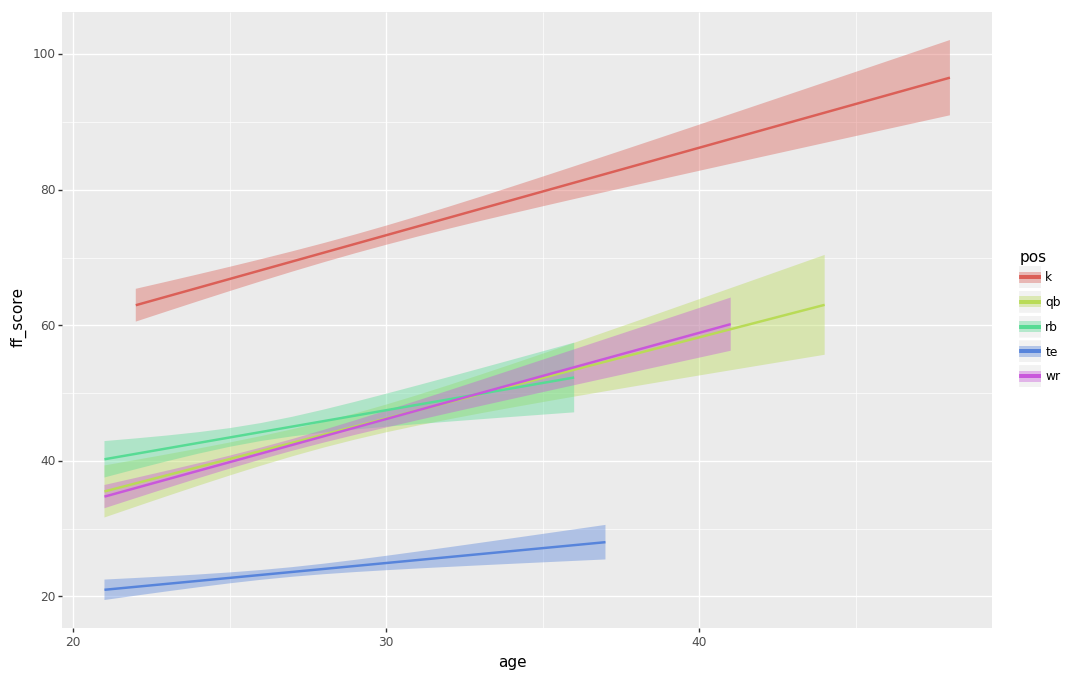

<ggplot: (53413731)>

In [19]:
ggplot(df_main[['age','ff_score','pos']],aes(x='age',y='ff_score', color='pos')) + geom_smooth(aes(fill='pos'))

E:\Anaconda3\envs\curriculum\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
E:\Anaconda3\envs\curriculum\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


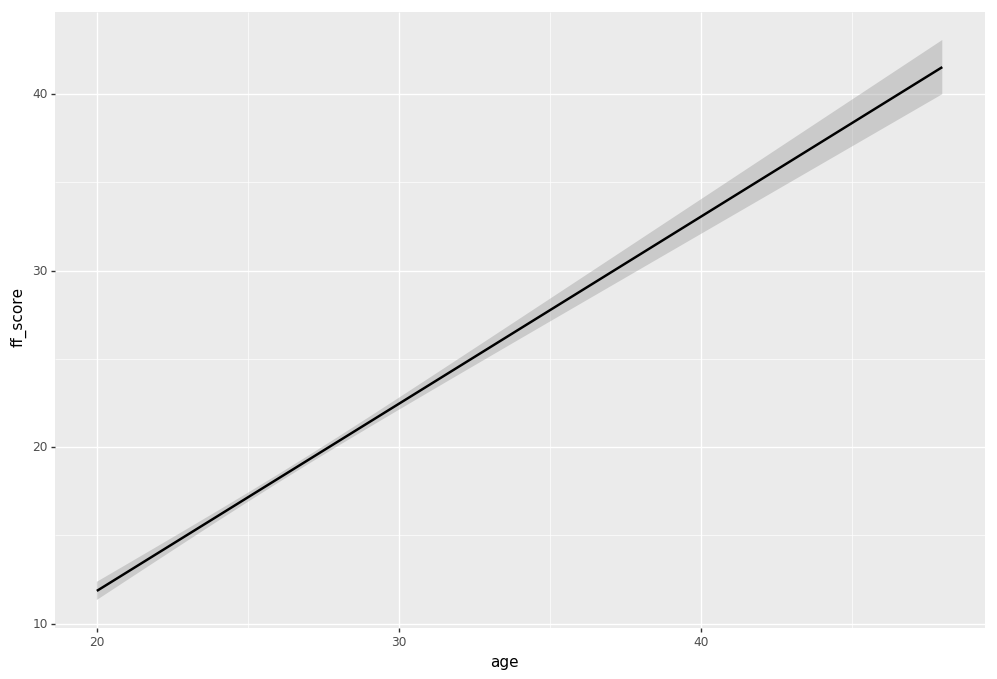

<ggplot: (17294905)>

In [5]:
ggplot(df_plyr[['age','ff_score','pos']],aes(x='age',y='ff_score')) + geom_smooth()